In [1]:
# Installing necessary packages
!pip install pandas 
!pip install transformers

In [2]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [3]:
datapath_train = "/content/gdrive/MyDrive/Colab Notebooks/IS 784/Proje/train.csv"

In [4]:
import pandas as pd

train = pd.read_csv(datapath_train)
display(train.shape, train.head(10))

(159571, 8)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
5,00025465d4725e87,"""\n\nCongratulations from me as well, use the ...",0,0,0,0,0,0
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0
7,00031b1e95af7921,Your vandalism to the Matt Shirvington article...,0,0,0,0,0,0
8,00037261f536c51d,Sorry if the word 'nonsense' was offensive to ...,0,0,0,0,0,0
9,00040093b2687caa,alignment on this subject and which are contra...,0,0,0,0,0,0


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             159571 non-null  object
 1   comment_text   159571 non-null  object
 2   toxic          159571 non-null  int64 
 3   severe_toxic   159571 non-null  int64 
 4   obscene        159571 non-null  int64 
 5   threat         159571 non-null  int64 
 6   insult         159571 non-null  int64 
 7   identity_hate  159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


In [6]:
train.describe()

,toxic,severe_toxic,obscene,threat,insult,identity_hate
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
train.isna().sum()

id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
dtype: int64

In [8]:
train["comment_text"][5]

'"\n\nCongratulations from me as well, use the tools well. \xa0· talk "'

### Text Cleaning

In [9]:
import re

def text_cleaning(text):
     # Remove URLs from dataset
     text = re.sub(r"https?://\S+|www\.\S+", " ", text)

     # Remove HTML
     html = re.compile(r"<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});")
     text = re.sub(html, " ", text)

     # Remove non-ASCII characters
     text = re.sub(r"[^\x00-\x7f]",r" ", text)

     # Remove punctiations
     text = re.sub(r'[]!"$%&\'()*+,./:;=#@?[\\^_`{|}~-]+', " ", text)

     # Remove \n 
     text = re.sub("\n", " ", text)

     text = re.sub("\w*\d\w*", " ", text)

     # Remove emoji
     emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
     text = emoji_pattern.sub(r" ", text)
     return text

In [10]:
train["comment_text"] = train["comment_text"].apply(lambda x: text_cleaning(x))
train["comment_text"].head()

0    Explanation Why the edits made under my userna...
1    D aww  He matches this background colour I m s...
2    Hey man  I m really not trying to edit war  It...
3      More I can t make any real suggestions on im...
4    You  sir  are my hero  Any chance you remember...
Name: comment_text, dtype: object

In [11]:
train.toxic.sum()

15294

In [12]:
for i in range(len(train)):
  if train.iloc[i,2] == 1 :
    train.iloc[i,2] = 1
  elif train.iloc[i,3] == 1 :
    train.iloc[i,2] = 1
  elif train.iloc[i,4] == 1 :
    train.iloc[i,2] = 1
  elif train.iloc[i,5] == 1 :
    train.iloc[i,2] = 1
  elif train.iloc[i,6] == 1 :
    train.iloc[i,2] = 1
  elif train.iloc[i,7] == 1 :
    train.iloc[i,2] = 1

In [13]:
print(" sum toxic:", train.toxic.sum(), "\n",
      "sum severe_toxic:", train.severe_toxic.sum(), "\n",
      "sum obscene:", train.obscene.sum(), "\n",
      "sum threat:", train.threat.sum(), "\n",
      "sum insult:", train.insult.sum(), "\n",
      "sum identity_hate:", train.identity_hate.sum())

 sum toxic: 16225 
 sum severe_toxic: 1595 
 sum obscene: 8449 
 sum threat: 478 
 sum insult: 7877 
 sum identity_hate: 1405


### Text Preprocessing BERT Uncased

In [14]:
from transformers import BertTokenizer

# Load the BERT tokenizer.
print('Loading BERT tokenizer...')
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)

Loading BERT tokenizer...


In [15]:
comment_text = train.comment_text.values
comment_labels = train.toxic.values

In [16]:
# Print the original comment.
print(' Original: ', comment_text[0])

# Print the comment split into tokens.
print('Tokenized: ', tokenizer.tokenize(comment_text[0]))

# Print the comment mapped to token ids.
print('Token IDs: ', tokenizer.convert_tokens_to_ids(tokenizer.tokenize(comment_text[0])))

 Original:  Explanation Why the edits made under my username Hardcore Metallica Fan were reverted  They weren t vandalisms  just closure on some GAs after I voted at New York Dolls FAC  And please don t remove the template from the talk page since I m retired now        
Tokenized:  ['explanation', 'why', 'the', 'edit', '##s', 'made', 'under', 'my', 'user', '##name', 'hardcore', 'metallic', '##a', 'fan', 'were', 'reverted', 'they', 'weren', 't', 'van', '##dal', '##isms', 'just', 'closure', 'on', 'some', 'gas', 'after', 'i', 'voted', 'at', 'new', 'york', 'dolls', 'fa', '##c', 'and', 'please', 'don', 't', 'remove', 'the', 'template', 'from', 'the', 'talk', 'page', 'since', 'i', 'm', 'retired', 'now']
Token IDs:  [7526, 2339, 1996, 10086, 2015, 2081, 2104, 2026, 5310, 18442, 13076, 12392, 2050, 5470, 2020, 16407, 2027, 4694, 1056, 3158, 9305, 22556, 2074, 8503, 2006, 2070, 3806, 2044, 1045, 5444, 2012, 2047, 2259, 14421, 6904, 2278, 1998, 3531, 2123, 1056, 6366, 1996, 23561, 2013, 1996, 2

In [17]:
max_len = 0

# For every comment...
for comment in comment_text:

    # Tokenize the text and add `[CLS]` and `[SEP]` tokens.
    input_ids = tokenizer.encode(comment, add_special_tokens=True)

    # Update the maximum comment length.
    max_len = max(max_len, len(input_ids))

print('Max sentence length: ', max_len)

Token indices sequence length is longer than the specified maximum sequence length for this model (538 > 512). Running this sequence through the model will result in indexing errors


Max sentence length:  2502


In [18]:
import torch

# Tokenize all of the comment and map the tokens to thier word IDs.
input_ids = []
attention_masks = []

# For every comment...
for comment in comment_text:
    # `encode_plus` will:
    #   (1) Tokenize the comment.
    #   (2) Prepend the `[CLS]` token to the start.
    #   (3) Append the `[SEP]` token to the end.
    #   (4) Map tokens to their IDs.
    #   (5) Pad or truncate the comment to `max_length`
    #   (6) Create attention masks for [PAD] tokens.
    encoded_dict = tokenizer.encode_plus(
                        comment,                      # Comment to encode.
                        add_special_tokens = True, # Add '[CLS]' and '[SEP]'
                        max_length = 64,           # Pad & truncate all comment.
                        pad_to_max_length = True,
                        return_attention_mask = True,   # Construct attn. masks.
                        return_tensors = 'pt',     # Return pytorch tensors.
                   )
    
    # Add the encoded comment to the list.    
    input_ids.append(encoded_dict['input_ids'])
    
    # And its attention mask (simply differentiates padding from non-padding).
    attention_masks.append(encoded_dict['attention_mask'])

# Convert the lists into tensors.
input_ids = torch.cat(input_ids, dim=0)
attention_masks = torch.cat(attention_masks, dim=0)
labels = torch.tensor(comment_labels)

# Print sentence 0, now as a list of IDs.
print('Original: ', comment_text[0])
print('Token IDs:', input_ids[0])
print('Label:', labels[0])

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
/usr/local/lib/python3.7/dist-packages/transformers/tokenization_utils_base.py:2111: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,


Original:  Explanation Why the edits made under my username Hardcore Metallica Fan were reverted  They weren t vandalisms  just closure on some GAs after I voted at New York Dolls FAC  And please don t remove the template from the talk page since I m retired now        
Token IDs: tensor([  101,  7526,  2339,  1996, 10086,  2015,  2081,  2104,  2026,  5310,
        18442, 13076, 12392,  2050,  5470,  2020, 16407,  2027,  4694,  1056,
         3158,  9305, 22556,  2074,  8503,  2006,  2070,  3806,  2044,  1045,
         5444,  2012,  2047,  2259, 14421,  6904,  2278,  1998,  3531,  2123,
         1056,  6366,  1996, 23561,  2013,  1996,  2831,  3931,  2144,  1045,
         1049,  3394,  2085,   102,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0])
Label: tensor(0)


In [19]:
from torch.utils.data import TensorDataset, random_split

# Combine the training inputs into a TensorDataset.
dataset = TensorDataset(input_ids, attention_masks, labels)

# Create a 80-20 train-test split.

# Calculate the number of samples to include in each set.
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size

# Divide the dataset by randomly selecting samples.
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

print('{:>5,} training samples'.format(train_size))
print('{:>5,} test samples'.format(test_size))

127,656 training samples
31,915 test samples


In [20]:
from torch.utils.data import DataLoader, RandomSampler, SequentialSampler

# The DataLoader needs to know our batch size for training, so we specify it 
# here. For fine-tuning BERT on a specific task, the authors recommend a batch 
# size of 16 or 32.
batch_size = 32

# Create the DataLoaders for our training and test sets.
# We'll take training samples in random order. 
train_dataloader = DataLoader(
            train_dataset,  # The training samples.
            sampler = RandomSampler(train_dataset), # Select batches randomly
            batch_size = batch_size # Trains with this batch size.
        )

# For test the order doesn't matter, so we'll just read them sequentially.
test_dataloader = DataLoader(
            test_dataset, # The test samples.
            sampler = SequentialSampler(test_dataset), # Pull out batches sequentially.
            batch_size = batch_size # Evaluate with this batch size.
        )

#### Model

In [21]:
from transformers import BertForSequenceClassification, AdamW, BertConfig

# Load BertForSequenceClassification, the pretrained BERT model with a single 
# linear classification layer on top. 
model_uncased = BertForSequenceClassification.from_pretrained(
    "bert-base-uncased", # Use the 12-layer BERT model, with an uncased vocab.
    num_labels = 2, # The number of output labels--2 for binary classification.  
    output_attentions = False, # Whether the model returns attentions weights.
    output_hidden_states = False, # Whether the model returns all hidden-states.
)
model_uncased.cuda()

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForSequenceClassification: ['cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, element

In [22]:
optimizer = AdamW(model_uncased.parameters(), lr = 2e-5, eps = 1e-8)

In [23]:
from transformers import get_linear_schedule_with_warmup

# Number of training epochs. The BERT authors recommend between 2 and 4. 
epochs = 2

# Total number of training steps is [number of batches] x [number of epochs]. 
total_steps = len(train_dataloader) * epochs

# Create the learning rate scheduler.
scheduler = get_linear_schedule_with_warmup(optimizer, num_warmup_steps = 0, # Default value in run_glue.py
                                            num_training_steps = total_steps)

In [24]:
import numpy as np
import time
import datetime

# Function to calculate the accuracy of our predictions vs labels
def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=1).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)


def format_time(elapsed):
    # Round to the nearest second.
    elapsed_rounded = int(round((elapsed)))
    # Format as hh:mm:ss
    return str(datetime.timedelta(seconds=elapsed_rounded))


In [25]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
import random
import numpy as np
seed_val = 42

random.seed(seed_val)
np.random.seed(seed_val)
torch.manual_seed(seed_val)
torch.cuda.manual_seed_all(seed_val)

# Store a number of quantities such as training and test loss, test accuracy, and timings.
training_stats_uncased = []
training_loss_uncased = []
test_loss_uncased = []
test_logits_uncased = []
# Measure the total training time for the whole run.
total_t0 = time.time()

# For each epoch...
for epoch in range(0, epochs):

    print("")
    print('======== Epoch {:} / {:} ========'.format(epoch + 1, epochs))

    # Measure how long the training epoch takes.
    t0 = time.time()

    # Reset the total loss for this epoch.
    total_train_loss_uncased = 0
    model_uncased.train()

    # For each batch of training data...
    for step, batch in enumerate(train_dataloader):

        # Progress update every 40 batches.
        if step % 40 == 0 and not step == 0:
            # Calculate elapsed time in minutes.
            elapsed = format_time(time.time() - t0)
            
            # Report progress.
            print('  Batch {:>5,}  of  {:>5,}.  Loss: {:}.   Elapsed: {:}.'.format(step, len(train_dataloader), loss, elapsed))
        # `batch` contains three pytorch tensors:
        #   [0]: input ids 
        #   [1]: attention masks
        #   [2]: labels 
        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)

        model_uncased.zero_grad()        
        output = model_uncased(b_input_ids,token_type_ids=None,attention_mask=b_input_mask,labels=b_labels)
        loss = output[0]
        logits_uncased = output[1]
        training_loss_uncased.append(loss)
        total_train_loss_uncased += loss.item()
        loss.backward()

        # Clip the norm of the gradients to 1.0.
        # This is to help prevent the "exploding gradients" problem.
        torch.nn.utils.clip_grad_norm_(model_uncased.parameters(), 1.0)
        optimizer.step()

        # Update the learning rate.
        scheduler.step()

    # Calculate the average loss over all of the batches.
    avg_train_loss_uncased = total_train_loss_uncased / len(train_dataloader)            
    
    # Measure how long this epoch took.
    training_time = format_time(time.time() - t0)

    print("")
    print("  Average training loss: {0:.2f}".format(avg_train_loss_uncased))
    print("  Training epcoh took: {:}".format(training_time))
        
    # ========================================
    #               Test
    # ========================================
    # After the completion of each training epoch, measure our performance on the test set.

    print("")
    print("Running Test...")

    t0 = time.time()

    # Put the model in evaluation mode--the dropout layers behave differently
    # during evaluation.
    model_uncased.eval()

    # Tracking variables 
    total_test_accuracy_uncased = 0
    total_test_loss_uncased = 0
    nb_test_steps = 0

    # Evaluate data for one epoch
    for batch in test_dataloader:

        b_input_ids = batch[0].to(device)
        b_input_mask = batch[1].to(device)
        b_labels = batch[2].to(device)

        with torch.no_grad():        

            output = model_uncased(b_input_ids, token_type_ids=None, attention_mask=b_input_mask, labels=b_labels)
            loss = output[0]
            logits = output[1]
        # Accumulate the test loss.
        test_loss_uncased.append(loss)
        test_logits_uncased.append(logits)
        total_test_loss_uncased += loss.item()

        # Move logits and labels to CPU
        logits = logits.detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()

        # Calculate the accuracy for this batch of test sentences.
        total_test_accuracy_uncased += flat_accuracy(logits, label_ids)
        

    # Report the final accuracy for this test run.
    avg_test_accuracy_uncased = total_test_accuracy_uncased / len(test_dataloader)
    print("  Accuracy: {0:.2f}".format(avg_test_accuracy_uncased))

    # Calculate the average loss over all of the batches.
    avg_test_loss_uncased = total_test_loss_uncased / len(test_dataloader)
    
    # Measure how long the test run took.
    test_time = format_time(time.time() - t0)
    
    print("  Test Loss: {0:.2f}".format(avg_test_loss_uncased))
    print("  Test took: {:}".format(test_time))

    # Record all statistics from this epoch.
    training_stats_uncased.append(
        {
            'epoch': epoch + 1,
            'Training Loss': avg_train_loss_uncased,
            'Test Loss': avg_test_loss_uncased,
            'Test. Accur.': avg_test_accuracy_uncased,
            'Training Time': training_time,
            'Test Time': test_time
        }
    )

print("")
print("Training complete!")

print("Total training took {:} (h:mm:ss)".format(format_time(time.time()-total_t0)))


======== Epoch 1 / 2 ========
  Batch    40  of  3,990.  Loss: 0.504616379737854.   Elapsed: 0:00:14.
  Batch    80  of  3,990.  Loss: 0.04865355044603348.   Elapsed: 0:00:28.
  Batch   120  of  3,990.  Loss: 0.11714666336774826.   Elapsed: 0:00:42.
  Batch   160  of  3,990.  Loss: 0.05278885364532471.   Elapsed: 0:00:56.
  Batch   200  of  3,990.  Loss: 0.02317267656326294.   Elapsed: 0:01:10.
  Batch   240  of  3,990.  Loss: 0.03199813514947891.   Elapsed: 0:01:25.
  Batch   280  of  3,990.  Loss: 0.32415467500686646.   Elapsed: 0:01:40.
  Batch   320  of  3,990.  Loss: 0.02482280507683754.   Elapsed: 0:01:55.
  Batch   360  of  3,990.  Loss: 0.15466158092021942.   Elapsed: 0:02:10.
  Batch   400  of  3,990.  Loss: 0.20486485958099365.   Elapsed: 0:02:24.
  Batch   440  of  3,990.  Loss: 0.1787867546081543.   Elapsed: 0:02:39.
  Batch   480  of  3,990.  Loss: 0.17713604867458344.   Elapsed: 0:02:54.
  Batch   520  of  3,990.  Loss: 0.16455936431884766.   Elapsed: 0:03:08.
  Batch   

In [26]:
import pandas as pd

# Display floats with two decimal places.
pd.set_option('precision', 2)

# Create a DataFrame from our training statistics.
df_stats = pd.DataFrame(data=training_stats_uncased)

# Use the 'epoch' as the row index.
df_stats = df_stats.set_index('epoch')

# Display the table.
df_stats

,Training Loss,Test Loss,Test. Accur.,Training Time,Test Time
epoch,,,,,
1,0.11,0.09,0.97,0:24:32,0:02:03
2,0.07,0.10,0.97,0:24:35,0:02:03


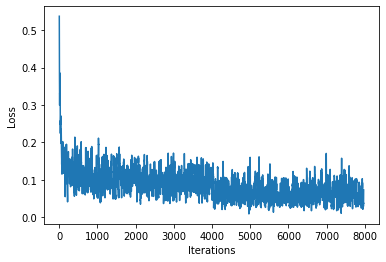

In [27]:
import matplotlib.pyplot as plt
% matplotlib inline

import seaborn as sns
# Plotting the loss graph smoothly. 
filter_size = 10
moving_average_filter = [1/filter_size] * filter_size
smoothed_loss_list = np.convolve(training_loss_uncased, moving_average_filter, 'valid') 
# Label the plot.
plt.figure()
plt.title("Training Loss")
plt.xlabel('Iterations')
plt.ylabel('Loss')
# Plot the loss curve
plt.plot(smoothed_loss_list)
plt.show()

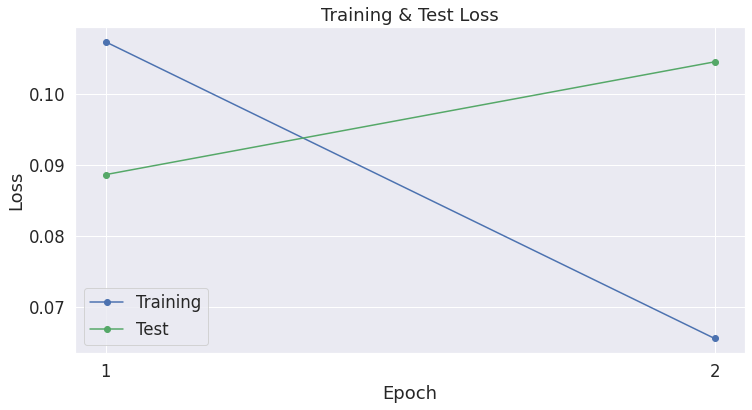

In [28]:
# Use plot styling from seaborn.
sns.set(style='darkgrid')

# Increase the plot size and font size.
sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (12,6)

# Plot the learning curve.
plt.plot(df_stats['Training Loss'], 'b-o', label="Training")
plt.plot(df_stats['Test Loss'], 'g-o', label="Test")

# Label the plot.
plt.title("Training & Test Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.xticks([1, 2])

plt.show()